# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


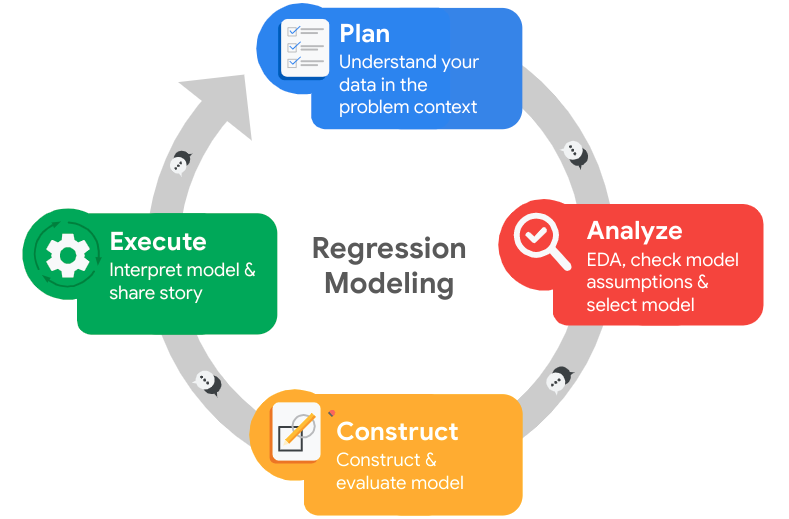

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
Ans:Salisfort leadership team. 
- What are you trying to solve or accomplish?
Ans: Trying to figure out how to improve employee retention. 
- What are your initial observations when you explore the data?
Ans: There are a lot of duplicates 
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
Ans: Google, previous lectures. 
- Do you have any ethical considerations in this stage?





[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [50]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay,classification_report
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0=df0.rename(columns= {'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1= df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

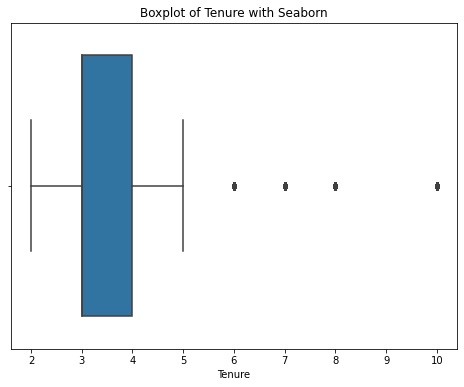

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sns.boxplot(x=df0['tenure'])
plt.title('Boxplot of Tenure with Seaborn')
plt.xlabel('Tenure')
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

percentile25=df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit=percentile75 + 1.5*iqr
lower_limit=percentile25 - 1.5*iqr
df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
There is definetely correlation between different variables some more than other. Employees working more hours and being part of more projects causes them to be less satisfied and as a result leave the company. 
- What do you observe about the distributions in the data?

- What transformations did you make with your data? Why did you chose to make those decisions?
Ans: Dropped missing values and renamed some of the column names for easier understanding. 
- What are some purposes of EDA before constructing a predictive model?
To understand the relationship between variables and how it affects our target variable. 
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
Using past course material and google. 

- Do you have any ethical considerations in this stage?
...




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print("left vs stayed: ", len(df1[df1['left']== 1]))
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
percent_left= (len(df1[df1['left']== 1])/len(df1))*100
print("percent left vs stayed:",percent_left)

left vs stayed:  1991
percent left vs stayed: 16.604119756484028


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

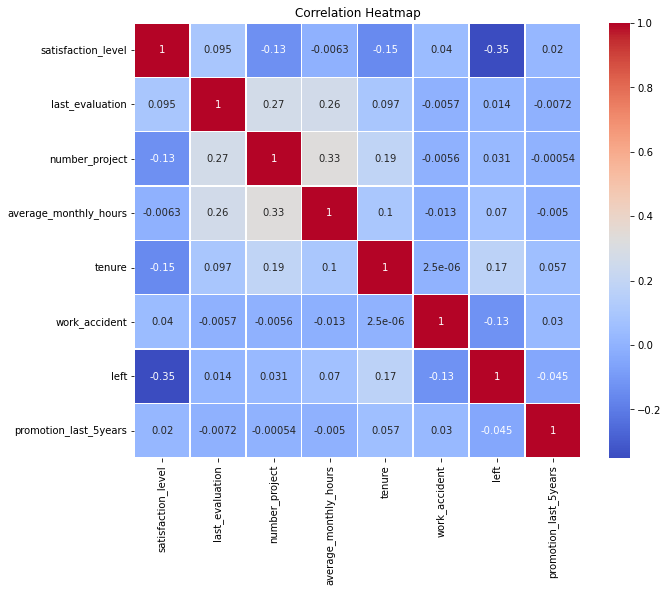

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
##ploting a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

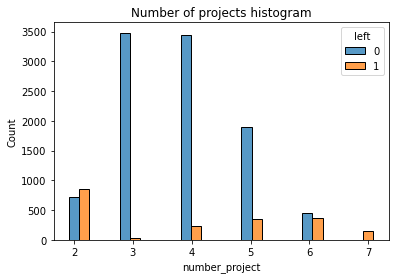

In [15]:
#Create a histogram

plot= sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2)
plot.set_title("Number of projects histogram")
plt.show()

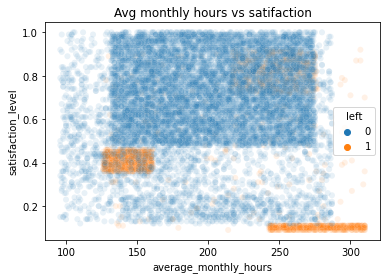

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.scatterplot(x="average_monthly_hours", y="satisfaction_level", hue="left",alpha=0.1, data=df1)

plt.title("Avg monthly hours vs satifaction")
plt.show()

It is clear that prople who have worked more than 250 hours and have lower than 0.2 satisfaction levels have mostly left. There is also a group with normal working hours and around 0.4 satisfaction rate. Its difficult to understand why they left. 

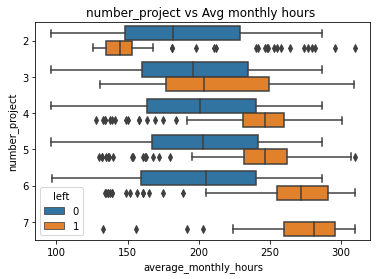

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data=df1,x="average_monthly_hours", y="number_project",hue="left",orient="h")
plt.title("number_project vs Avg monthly hours ")
plt.show()

Everyone who is given seven projects have left the company. People in this company seemed to be overworked. There also seems to be a lot of people leaving the company when they work 240 or more hours per month. 

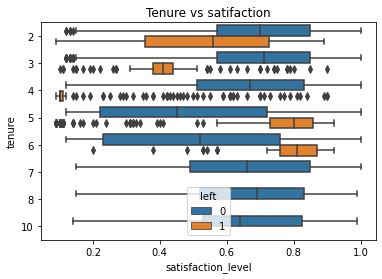

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data=df1,x="satisfaction_level", y="tenure",hue="left",orient="h")
plt.title("Tenure vs satifaction")
plt.show()

People with 2 and 3 year tenures are leaving more when they have lower satisfaction.  There seems to be a group leaving who have 5-6 years tenure and over 0.7 satisfaction. People with higher than 7 years tenure are not inclined to leave. 

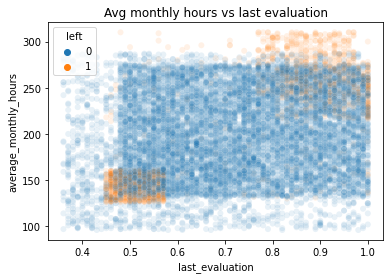

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.scatterplot(x="last_evaluation", y="average_monthly_hours", hue="left",alpha=0.1, data=df1)

plt.title("Avg monthly hours vs last evaluation")
plt.show()

Employees who received evaluation scores between 0.4 and 0.6 seem to have left even with working hours between 150 and less. Another group of employees who left were ones with high evaluation scores but were overworked. 

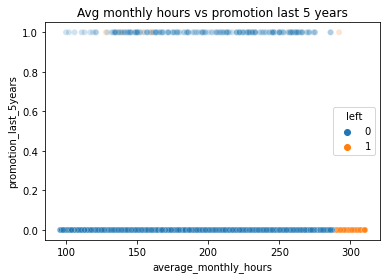

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.scatterplot(x="average_monthly_hours", y="promotion_last_5years", hue="left",alpha=0.2, data=df1)

plt.title("Avg monthly hours vs promotion last 5 years")
plt.show()

Employees who have been promoted seem to have been working less extreme hours. It seems like just by working extra hours does not lead to promotions. Employees who have been promoted are more likely to stay vs overworked employees who have not been promoted.  

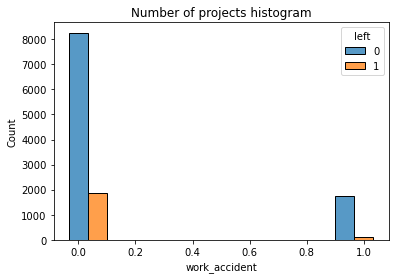

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plot= sns.histplot(data=df1, x='work_accident', hue='left', multiple='dodge', shrink=2)
plot.set_title("Number of projects histogram")
plt.show()

### Insights

The correlation heat map shows strong correlation between number_projects and last evaluation,average_monthly_hours and number_projects and a negative correlation between satisfaction_level and leaving the company. Overall the people in this company are overworked and mostly leaving due to possible burn out. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

It is to predict whether an employee will leave the company or stay based on some independent variables. The target variable is categorical type. 

### Identify the types of models most appropriate for this task.

A binary logistic regression model will work since the outcome variable is binary. encoding department column to binary and salary to numeric between 0-2. 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [36]:
### YOUR CODE HERE ###
#Converting non numeric variables to numeric
enc_df1= df1.copy()


#Convert categorical variable for income into numeric
priority_mapping = {'low': 0, 'medium': 1, 'high': 2}
enc_df1['salary'] = enc_df1['salary'].map(priority_mapping)

# Use get_dummies to perform encoding

enc_df1= pd.get_dummies(enc_df1,drop_first=False)


enc_df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [37]:
#Remove Outliers
df_logreg = enc_df1[(enc_df1['tenure'] >= lower_limit) & (enc_df1['tenure'] <= upper_limit)]

#Create X and Y variables

y = df_logreg['left']
X = df_logreg.drop('left',axis=1)





In [38]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
#Fit the model

log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)


In [39]:
#Get Predictions on the test data
y_pred=log_clf.predict(X_test)

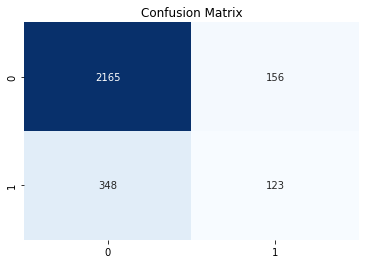

0    0.831468
1    0.168532
Name: left, dtype: float64

In [55]:
#Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Confusion Matrix')
plt.show()

df_logreg['left'].value_counts(normalize=True)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
Ans:After conducting the logistic regression model the weighted average precision score was 0.79, recall was 0.82, accuracy was 0.82 and f1 score was 0.80. The employees who are overworked and have over 4 projects seems to be the ones least satisfied and are leaving. The highest working employees are also not getting promoted in the last 4 years.  
- What business recommendations do you propose based on the models built?
Ans: Employee work life balance need to improve. Either promote employees who work longer hour or encourage them to work more standard hours. Maybe provide overtime if working overtime is neccesarry. Limit the number of projects an employee is working to 3-4. Have company wide surveys to get employee satisfaction anonymously. Also make sure that employee evaluation follows up with support and actionable improvements. 
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
Ans: Maybe a tree based random forest model could provide better metrics. Using feature engineering could help improve our outcome or prediction. 
- Given what you know about the data and the models you were using, what other questions could you address for the team?
Pay disparity between departments and different tenure levels. 

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

After conducting the logistic regression model the weighted average precision score was 0.79, recall was 0.82, accuracy was 0.82 and f1 score was 0.80.

### Conclusion, Recommendations, Next Steps
The employees who are overworked and have over 4 projects seems to be the ones least satisfied and are leaving. The highest working employees are also not getting promoted in the last 4 years.

Employee work life balance need to improve. Either promote employees who work longer hour or encourage them to work more standard hours. Maybe provide overtime pay if working overtime is neccesarry. Limit the number of projects an employee is working to 3-4. Have company wide surveys to get employee satisfaction anonymously. Also make sure that employee evaluation follows up with support and actionable improvements. Have programs such as mental health days, good Paid time Off programs and overall any initiative that would improve work life balance so that employees do not get burnt out. Evaluation scores should not focus on hours worked but more to effective work being done. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.